<a href="https://colab.research.google.com/github/SaswatD27/CS460-NISER-Fall-Semester-2021-22/blob/main/MyPerceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Me and My Three Brain Cells : Perceptrons!**

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
db=np.genfromtxt('Iris1.csv',delimiter=',')#Checking whether a given flower is of the Iris Setosa species or not
db=db[1:]
print(db)

[[ 1.00e+00  5.10e+00  3.50e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 2.00e+00  4.90e+00  3.00e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 3.00e+00  4.70e+00  3.20e+00  1.30e+00  2.00e-01  1.00e+00]
 [ 4.00e+00  4.60e+00  3.10e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 5.00e+00  5.00e+00  3.60e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 6.00e+00  5.40e+00  3.90e+00  1.70e+00  4.00e-01  1.00e+00]
 [ 7.00e+00  4.60e+00  3.40e+00  1.40e+00  3.00e-01  1.00e+00]
 [ 8.00e+00  5.00e+00  3.40e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 9.00e+00  4.40e+00  2.90e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 1.00e+01  4.90e+00  3.10e+00  1.50e+00  1.00e-01  1.00e+00]
 [ 1.10e+01  5.40e+00  3.70e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 1.20e+01  4.80e+00  3.40e+00  1.60e+00  2.00e-01  1.00e+00]
 [ 1.30e+01  4.80e+00  3.00e+00  1.40e+00  1.00e-01  1.00e+00]
 [ 1.40e+01  4.30e+00  3.00e+00  1.10e+00  1.00e-01  1.00e+00]
 [ 1.50e+01  5.80e+00  4.00e+00  1.20e+00  2.00e-01  1.00e+00]
 [ 1.60e+01  5.70e+00  4.40e+00  1.50e+00  4.00e-01  1.

##**1. Normal Vanilla Perceptron**
###Training Algorithm

In [18]:
def perc_train(db):
  w=np.zeros(len(db[0])-1)
  G=[]
  a=0
  flag=0
  i=0
  epoch=0
  nu=0.2
  while(flag!=1):
    count=0
    for x in db:
      i+=1
      #print(x,i)
      a=np.dot(w,x[:-1])
      #print(a)
      if a*x[-1]<=0:
        count+=1
        w+=(nu*x[-1])*x[:-1]
    epoch+=1
    print("Epoch - ",epoch," done.","\n w =",w)
    G.append(w.copy())
    #print(G)
    if count==0:
      flag=1
  return [w,G]

###Prediction and Testing Functions

In [8]:
def perc_pred(w,x):
  #print(np.sign(np.dot(w,x)))
  return np.sign(np.dot(w,x))
def count_perc_acc(w,db):
  count=0
  for x in db:
    if x[-1]==perc_pred(w,x[:-1]):
      count+=1
  return count/len(db)

###Splitting Dataset

###Actual Training on the Dataset

In [20]:
X=[x for x in db]
y=[x[-1] for x in db]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
w1=perc_train(x_train)
print(w1[0])

Epoch -  1  done. 
 w = [-29.6   10.56   8.66  -0.04  -1.02]
Epoch -  2  done. 
 w = [-2.6  25.6  20.46  1.28 -1.64]
Epoch -  3  done. 
 w = [-4.2  32.34 26.08  0.2  -2.8 ]
Epoch -  4  done. 
 w = [-6.4  36.52 30.12 -0.78 -3.66]
Epoch -  5  done. 
 w = [-9.   42.62 35.5  -2.   -4.88]
Epoch -  6  done. 
 w = [-12.6   47.98  40.36  -2.86  -5.86]
Epoch -  7  done. 
 w = [-6.   53.82 45.26 -3.76 -6.76]
Epoch -  8  done. 
 w = [-13.6   57.44  48.42  -5.12  -7.92]
Epoch -  9  done. 
 w = [-12.    62.2   52.42  -5.52  -8.7 ]
Epoch -  10  done. 
 w = [-14.    65.28  55.94  -6.88  -9.66]
Epoch -  11  done. 
 w = [-14.8   67.88  58.66  -7.76 -10.42]
Epoch -  12  done. 
 w = [-10.2   69.7   61.04  -8.86 -11.08]
Epoch -  13  done. 
 w = [-10.4   72.66  64.06 -10.36 -12.08]
Epoch -  14  done. 
 w = [-10.6   75.62  67.08 -11.86 -13.08]
Epoch -  15  done. 
 w = [-10.8   78.58  70.1  -13.36 -14.08]
Epoch -  16  done. 
 w = [-11.    81.54  73.12 -14.86 -15.08]
Epoch -  17  done. 
 w = [-11.2   84.5   7

###Testing the Accuracy of the Model
(Will be 1 anyway given that the training algorithm terminated)

In [22]:
acc_van=count_perc_acc(w1[0],x_test)
print(acc_van)

1.0


### Accuracy vs Number of Epochs Elapsed


In [34]:
G1=w1[1]
#print(G)
x=np.arange(len(G1))
y=[count_perc_acc(G1[i],x_test) for i in range(len(G1))]
print(y)

[0.6666666666666666, 0.8444444444444444, 0.9555555555555556, 0.9777777777777777, 0.8666666666666667, 0.8444444444444444, 0.8666666666666667, 0.8444444444444444, 0.9333333333333333, 0.8444444444444444, 0.8444444444444444, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 1.0, 1.0, 0.9555555555555556, 0.9555555555555556, 1.0, 1.0, 0.9555555555555556, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9555555555555556, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9555555555555556, 0.9555555555555556, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9555555555555556, 1.0, 1.0, 0.9555555555555556, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 0.9555555555555556, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0]


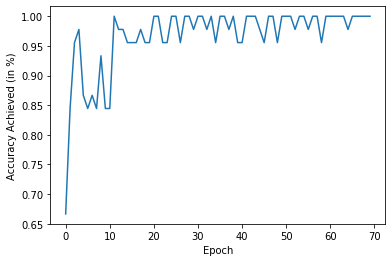

In [35]:
plt.plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Accuracy Achieved (in %)")
plt.show()


Accuracy shoots up quite steeply at first, then oscillates a bit, but it does achieve 100% accuracy. Hallelujah!

##**2. Voted Perceptron**
###Training Algorithm

In [26]:
def voted_perc_train(db):
  W=[]
  G=[]
  w=np.zeros(len(db[0])-1)
  a=0
  flag=0
  i=0
  epoch=0
  nu=0.2
  while(flag!=1):
    count=0
    c=0
    for x in db:
      i+=1
      #print(x,i)
      a=np.dot(w,x[:-1])
      #print(a)
      if a*x[-1]>0:
        c+=1
      else:
        count+=1
        W.append([w.copy(),c])
        w+=(nu*x[-1])*x[:-1]
    epoch+=1
    print("Epoch - ",epoch," done.","\n w =",w)
    G.append(W.copy())
    if count==0:
      flag=1
  return [W,G]

###Prediction and Testing Functions

In [27]:
def voted_perc_pred(W,x):
  sum1=0
  for i in range(len(W)):
    sum1+=(W[i][1]*np.dot(W[i][0],x))
  return np.sign(sum1)

def count_voted_perc_acc(W,db):
  count=0
  for x in db:
    if x[-1]==voted_perc_pred(W,x[:-1]):
      count+=1
  return count/len(db)

###Actual Training on the Dataset

In [28]:
W1=voted_perc_train(x_train)
print(W1[0])

Epoch -  1  done. 
 w = [-29.6   10.56   8.66  -0.04  -1.02]
Epoch -  2  done. 
 w = [-2.6  25.6  20.46  1.28 -1.64]
Epoch -  3  done. 
 w = [-4.2  32.34 26.08  0.2  -2.8 ]
Epoch -  4  done. 
 w = [-6.4  36.52 30.12 -0.78 -3.66]
Epoch -  5  done. 
 w = [-9.   42.62 35.5  -2.   -4.88]
Epoch -  6  done. 
 w = [-12.6   47.98  40.36  -2.86  -5.86]
Epoch -  7  done. 
 w = [-6.   53.82 45.26 -3.76 -6.76]
Epoch -  8  done. 
 w = [-13.6   57.44  48.42  -5.12  -7.92]
Epoch -  9  done. 
 w = [-12.    62.2   52.42  -5.52  -8.7 ]
Epoch -  10  done. 
 w = [-14.    65.28  55.94  -6.88  -9.66]
Epoch -  11  done. 
 w = [-14.8   67.88  58.66  -7.76 -10.42]
Epoch -  12  done. 
 w = [-10.2   69.7   61.04  -8.86 -11.08]
Epoch -  13  done. 
 w = [-10.4   72.66  64.06 -10.36 -12.08]
Epoch -  14  done. 
 w = [-10.6   75.62  67.08 -11.86 -13.08]
Epoch -  15  done. 
 w = [-10.8   78.58  70.1  -13.36 -14.08]
Epoch -  16  done. 
 w = [-11.    81.54  73.12 -14.86 -15.08]
Epoch -  17  done. 
 w = [-11.2   84.5   7

###Testing the Accuracy of the Model

In [32]:
acc_van=count_voted_perc_acc(W1[0],x_test)
print(acc_van)

0.8888888888888888


### Accuracy vs Number of Epochs Elapsed


In [37]:
G2=W1[1]
#print(G)
x=np.arange(len(G2))
y=[count_voted_perc_acc(G2[i],x_test) for i in range(len(G2))]
print(y)

[0.7111111111111111, 0.7333333333333333, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.8222222222222222, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8666666666666667, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888,

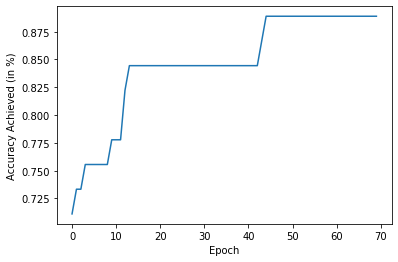

In [38]:
plt.plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Accuracy Achieved (in %)")
plt.show()

It resembles a step function, staying stable at times, with not as much of a sharp incline at first but it does get to a respectable 88.89% more or less.

The vanilla perceptron seems to have performed better overall,right from the start but the interesting thing about this voted perceptron is that unlike in the case of the vanilla perceptron, accuracy only ever increased for the voted one, like a monotone function.

Suffice it to say that the voting process definitely is interesting.

(Note: I used a learning rate of 0.2 but that can be turned up to 1 of course.)